<h1>Séries Temporais
    

In [4]:
import datetime
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [5]:
style.use('fivethirtyeight')

In [6]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [22]:
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2022, 4, 18)
empresa = 'PBR'
ptbr = web.get_data_yahoo(empresa, start, end)

In [8]:
type(ptbr)

pandas.core.frame.DataFrame

In [9]:
ptbr.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-17,8.47,7.99,8.02,8.43,31789000.0,5.750809
2021-03-18,8.49,8.14,8.31,8.23,35546000.0,5.614372
2021-03-19,8.61,8.18,8.28,8.49,29644800.0,5.791740
2021-03-22,8.44,8.20,8.34,8.37,23507200.0,5.709878
2021-03-23,8.45,8.13,8.26,8.15,30057300.0,5.559797


In [10]:
ptbr['Open']

Date
2021-03-17     8.02
2021-03-18     8.31
2021-03-19     8.28
2021-03-22     8.34
2021-03-23     8.26
              ...  
2022-04-11    15.69
2022-04-12    15.95
2022-04-13    15.84
2022-04-14    14.68
2022-04-18    14.71
Name: Open, Length: 275, dtype: float64

<AxesSubplot:xlabel='Date'>

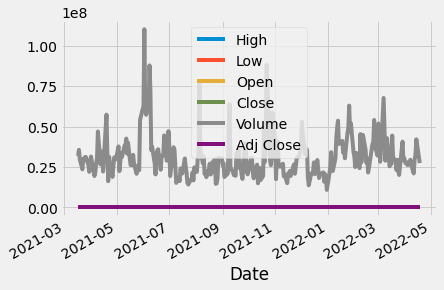

In [11]:
ptbr.plot()

In [12]:
PTBR_final_prices = pd.DataFrame(ptbr['Close'])

In [13]:
PTBR_final_prices

,Close
Date,
2021-03-17,8.43
2021-03-18,8.23
2021-03-19,8.49
2021-03-22,8.37
2021-03-23,8.15
...,...
2022-04-11,15.55
2022-04-12,15.66
2022-04-13,15.96


In [14]:
PTBR_final_prices.isnull()

,Close
Date,
2021-03-17,False
2021-03-18,False
2021-03-19,False
2021-03-22,False
2021-03-23,False
...,...
2022-04-11,False
2022-04-12,False
2022-04-13,False


In [15]:
PTBR_final_prices.notnull()

,Close
Date,
2021-03-17,True
2021-03-18,True
2021-03-19,True
2021-03-22,True
2021-03-23,True
...,...
2022-04-11,True
2022-04-12,True
2022-04-13,True


# Operações com Datas

In [16]:
natal = pd.datetime(2021,12,25)
natal

/tmp/ipykernel_12560/3360880609.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  natal = pd.datetime(2021,12,25)


datetime.datetime(2021, 12, 25, 0, 0)

In [17]:
boxingDay = natal + pd.DateOffset(days = 1)
boxingDay

Timestamp('2021-12-26 00:00:00')

In [18]:
boxingDay + pd.DateOffset(weeks = 1)

Timestamp('2022-01-02 00:00:00')

In [19]:
boxingDay + 2 * pd.DateOffset(years = 1, months = 2)

Timestamp('2024-04-26 00:00:00')

In [20]:
lastDay = pd.datetime(2022, 4, 18)

/tmp/ipykernel_12560/3324714116.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  lastDay = pd.datetime(2022, 4, 18)


In [21]:
from pandas.tseries.offsets import QuarterBegin

In [25]:
dtoffset = QuarterBegin()
lastDay + dtoffset

Timestamp('2022-06-01 00:00:00')

In [23]:
firstQuarterLastDay = pd.datetime(2021, 3, 31)

/tmp/ipykernel_12560/2790678682.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  firstQuarterLastDay = pd.datetime(2021, 3, 31)


In [27]:
dtoffset.rollforward(firstQuarterLastDay)

Timestamp('2021-06-01 00:00:00')

In [28]:
today = pd.datetime.now()

/tmp/ipykernel_12560/2268959946.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  today = pd.datetime.now()


### 1 semana a partir de hoje

In [29]:
today + pd.DateOffset(weeks = 1)

Timestamp('2022-07-18 18:50:07.475746')

### 5 anos a partir de hoje

In [30]:
today + 2 * pd.DateOffset(years = 2, months = 6)

Timestamp('2027-07-11 18:50:07.475746')

## Conversão entre tipos de dados para Séries Temporais

In [31]:
worldCupFinal = pd.to_datetime('07/13/2015')
worldCupFinal

Timestamp('2015-07-13 00:00:00')

In [32]:
worldCupFinal.to_period('D')

Period('2015-07-13', 'D')

In [33]:
worldCupKickoff=pd.Period('06/12/2015','D')
worldCupKickoff

Period('2015-06-12', 'D')

In [34]:
worldCupKickoff.to_timestamp()

Timestamp('2015-06-12 00:00:00')

In [35]:
worldCupDays=pd.date_range('06/12/2014', periods = 32, freq = 'D')
worldCupDays

DatetimeIndex(['2014-06-12', '2014-06-13', '2014-06-14', '2014-06-15',
               '2014-06-16', '2014-06-17', '2014-06-18', '2014-06-19',
               '2014-06-20', '2014-06-21', '2014-06-22', '2014-06-23',
               '2014-06-24', '2014-06-25', '2014-06-26', '2014-06-27',
               '2014-06-28', '2014-06-29', '2014-06-30', '2014-07-01',
               '2014-07-02', '2014-07-03', '2014-07-04', '2014-07-05',
               '2014-07-06', '2014-07-07', '2014-07-08', '2014-07-09',
               '2014-07-10', '2014-07-11', '2014-07-12', '2014-07-13'],
              dtype='datetime64[ns]', freq='D')

In [36]:
worldCupDays.to_period()

PeriodIndex(['2014-06-12', '2014-06-13', '2014-06-14', '2014-06-15',
             '2014-06-16', '2014-06-17', '2014-06-18', '2014-06-19',
             '2014-06-20', '2014-06-21', '2014-06-22', '2014-06-23',
             '2014-06-24', '2014-06-25', '2014-06-26', '2014-06-27',
             '2014-06-28', '2014-06-29', '2014-06-30', '2014-07-01',
             '2014-07-02', '2014-07-03', '2014-07-04', '2014-07-05',
             '2014-07-06', '2014-07-07', '2014-07-08', '2014-07-09',
             '2014-07-10', '2014-07-11', '2014-07-12', '2014-07-13'],
            dtype='period[D]')

## Plot com Matplotlib

In [37]:
import numpy as np

In [38]:
X = np.linspace(-np.pi, np.pi, 256, endpoint = True)
f,g = np.cos(X) + np.sin(X), np.sin(X) - np.cos(X)
f_serie = pd.Series(f)
g_serie = pd.Series(g)
plotDF = pd.concat([f_serie, g_serie], axis = 1)
plotDF.index = X
plotDF.columns = ['sin(x)+cos(x)','sin(x)-cos(x)']
plotDF.head()


,sin(x)+cos(x),sin(x)-cos(x)
-3.141593,-1.000000,1.000000
-3.116953,-1.024334,0.975059
-3.092313,-1.048046,0.949526
-3.067673,-1.071122,0.923417
-3.043033,-1.093547,0.896747


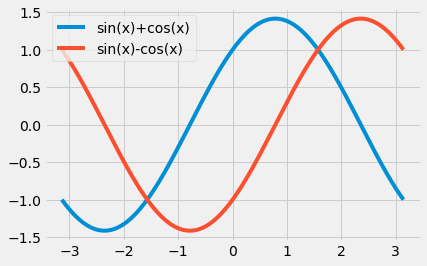

In [39]:
plotDF.plot()
plt.show()

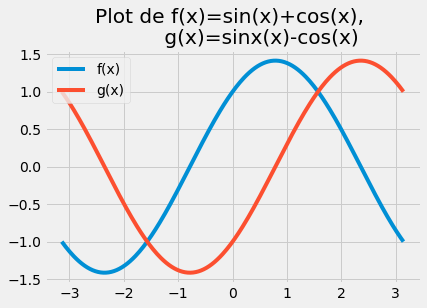

In [40]:
plotDF.columns = ['f(x)','g(x)']
plotDF.plot(title = 'Plot de f(x)=sin(x)+cos(x), \n         g(x)=sinx(x)-cos(x)')
plt.show()

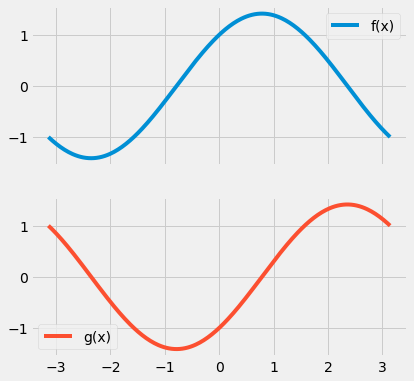

In [41]:
# Subplots
plotDF.plot(subplots = True, figsize = (6,6))
plt.show()